In [2]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
# Το circles στην ουσία είναι ένας πίνακας που θα κρατάει τα 4 σημεία που επέλεξε ο χρήστης.
image = cv2.imread("granma.png")
circles = np.zeros((4,2), np.int)

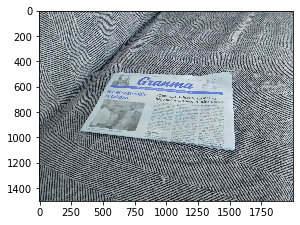

In [4]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.show()

In [5]:
# Θα φτιάξω κάποιες βοηθητικές συναρτήσεις.
# Αυτή η συνάρτηση θα βάζει στον παραπάνω πίνακα τα σημεία στους άξονες x, y 
# που πάτησε ο χρήστης.
def coordinates(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        circles[counter] = x, y
        counter = counter + 1
    #
#

In [6]:
# Εδώ είναι η βασική αλλαγή που πρέπει να κάνουμε. Η μέθοδος αυτή υπολογίζει 
# τα a1,a2,...,a8 που χρειαζόμαστε.
# Οπότε φτιάχνουμε τους πίνακες: 
# Α που είδαμε στο μάθημα
# b που περιέχει τα αρχικά σημεία αλλά και τα τελικά
# x τον οποίο θέλουμε να βρούμε τις τιμές τους.
# Η συνάρτηση επιστρέφει x = A-1 @ b λύνοντας ως προς x την: ( Ax = b )

def myPerspectiveTransform(points1, points2):
    x = np.zeros((8, 1))
    b = np.array([
        [0],
        [0],
        [points2[1][0]],
        [0],
        [0],
        [points2[2][1]],
        [points2[3][0]],
        [points2[3][1]]])
    A = np.array([
        [points1[0][0], points1[0][1], 1, 0, 0, 0, - points1[0]
            [0]*points2[0][0], - points1[0][1]*points2[0][0]],
        [0, 0, 0, points1[0][0], points1[0][1], 1, - points1[0]
            [0]*points2[0][1], - points1[0][1]*points2[0][1]],
        [points1[1][0], points1[1][1], 1, 0, 0, 0, -points1[1]
            [0]*points2[1][0], - points1[1][1]*points2[1][0]],
        [0, 0, 0, points1[1][0], points1[1][1], 1, - points1[1]
            [0]*points2[1][1], - points1[1][1]*points2[1][1]],
        [points1[2][0], points1[2][1], 1, 0, 0, 0, -points1[2]
            [0]*points2[2][0], - points1[2][1]*points2[2][0]],
        [0, 0, 0, points1[2][0], points1[2][1], 1, - points1[2]
            [0]*points2[2][1], - points1[2][1]*points2[2][1]],
        [points1[3][0], points1[3][1], 1, 0, 0, 0, -points1[3]
            [0]*points2[3][0], - points1[3][1]*points2[3][0]],
        [0, 0, 0, points1[3][0], points1[3][1], 1, - points1[3]
            [0]*points2[3][1], - points1[3][1]*points2[3][1]]])
    _A = np.linalg.inv(A)
    x = _A @ b
    result = np.array([
        [x[0][0], x[1][0], x[2][0]],
        [x[3][0], x[4][0], x[5][0]],
        [x[6][0], x[7][0], 1]])
    return result

In [7]:
# Σε αυτή την συνάρτηση στο αρχείο warp.py τρέχει μία while η οποία ανοίγει η εικόνα μας
# και περιμένει 4 σημεία (κλικς) στην εικόνα. Όταν ολοκληρωθούν τα κλικς τότε αποθηκεύονται 
# στον πίνακα circles που υπάρχει παραπάνω και αποθηκεύονται με την σειρά στο points1
# Στο points2 αποθηκεύονται τα σημεία που θέλουμε να αντιστοιχούν τα αρχικά.

# Για την σωστή υλοποίηση της συνάρτησης ο χρήστης πρέπει να διαλέξει πρώτα το πάνω αριστερά
# σημείο μετά το πάνω δεξιά μετά το κάτω αριστερά και τέλος το κάτω δεξιά.

# Επιλέγονται τα 4 σημεία χειροκίνητα ώστε στην παρουσίαση να φανεί η φωτογραφία της 
# εκφώνησης.

def warp(img):
    width, height = 1000,1000
    points1 = np.float32([[597,493],[1504, 496],[328,951],[1526,1102]])
    points2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
    myMatrix = myPerspectiveTransform(points1, points2)
    imgOutput = cv2.warpPerspective(img, myMatrix, (width, height))
    return imgOutput
    

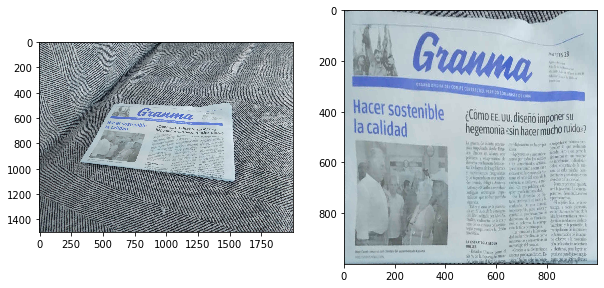

In [8]:
# Έτοιμοι να καλέσουμε την συνάρτηση και να γίνει έλεγχος της συνάρτησης. 
output = warp(image)
fig = plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.show()